<a href="https://colab.research.google.com/github/mwithgod3952/Machine_Learning_Theory_jh/blob/master/R_decision_tree_random_forest_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("party")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’




In [2]:
# 분실값을 잘 처리하지 못하는 문제를 갖고 있는 것이 단점이다.
# tree에 투입된 데이터가 표시가 되지 않거나 predict가 실패하는 경우 문제가 발생할 수 있다.
library(party)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



In [3]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [4]:
idx <- sample(2, nrow(iris), replace=TRUE,  prob=c(0.7, 0.3))
train.data <- iris[idx==2,]
test.data <- iris[idx==1,]

In [5]:
# 모델 생성
iris.tree <- ctree(Species~., data=train.data)

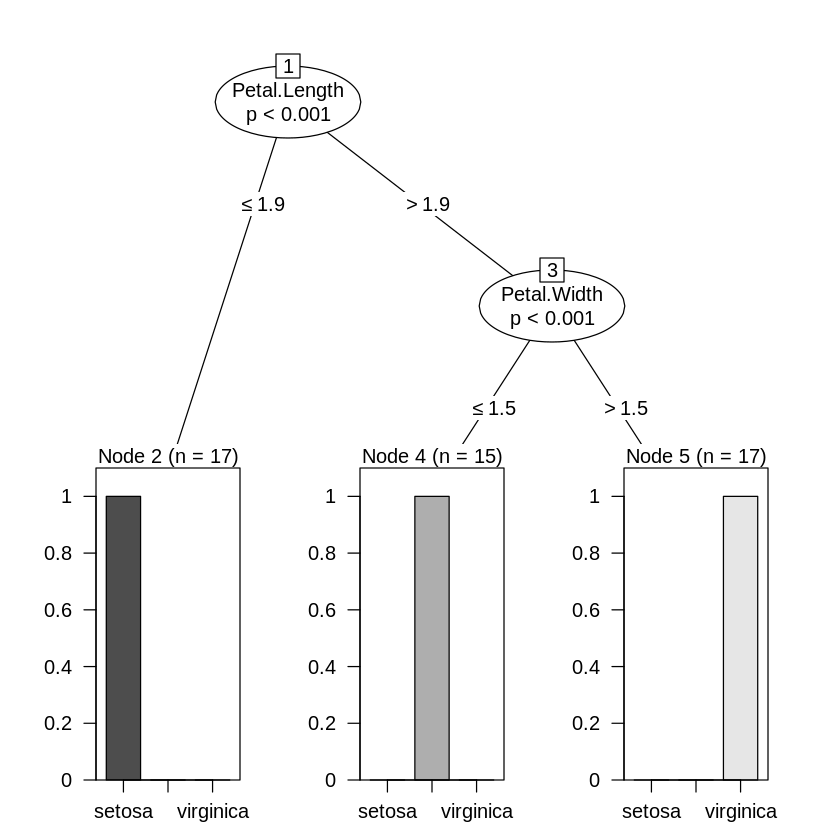

In [6]:
plot(iris.tree)

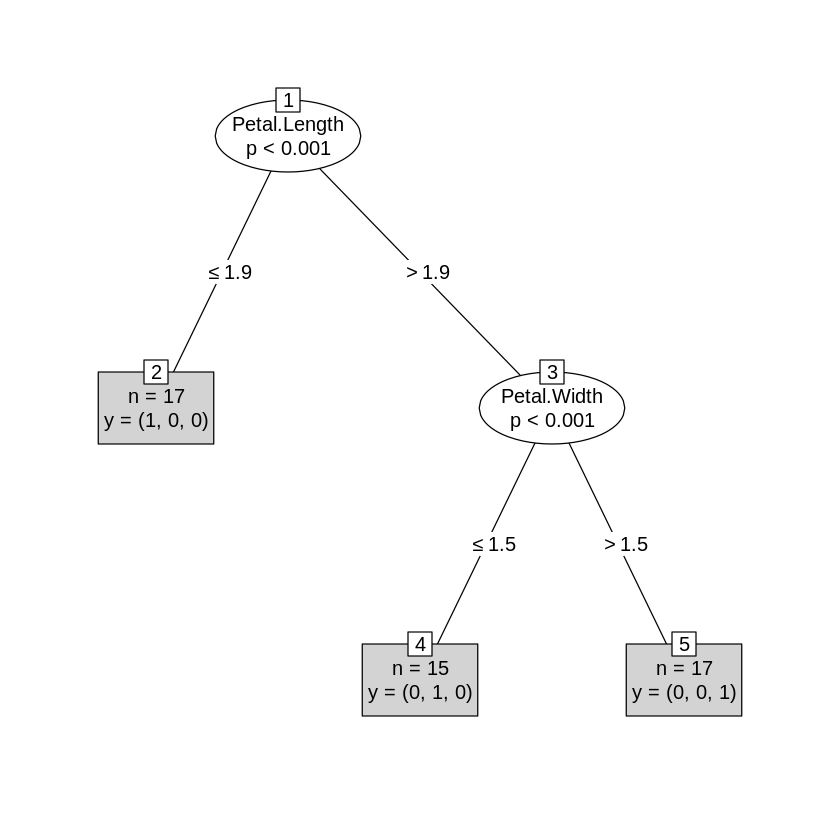

In [7]:
plot(iris.tree, type="simple")

In [8]:
# 예측된 데이터와 실제 데이터를 비교하기 위해 1_ 테이블 생성
table(predict(iris.tree), train.data$Species)

            
             setosa versicolor virginica
  setosa         17          0         0
  versicolor      0         15         0
  virginica       0          0        17

In [9]:
# 정확성 인
test.pre <- predict(iris.tree, newdata=test.data)
table(test.pre, test.data$Species)

            
test.pre     setosa versicolor virginica
  setosa         33          0         0
  versicolor      0         30         3
  virginica       0          5        30

In [10]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [12]:
idx <- sample(2, nrow(iris), replace=TRUE, prob=c(0.7,0.3))
train.data <- iris[idx==2,]
test.data <- iris[idx==1,]

In [13]:
r.f <- randomForest(Species~., data=train.data, ntree=100, proximity=TRUE)

In [14]:
table(predict(r.f), train.data$Species)

            
             setosa versicolor virginica
  setosa         17          0         0
  versicolor      0         17         0
  virginica       0          1        13

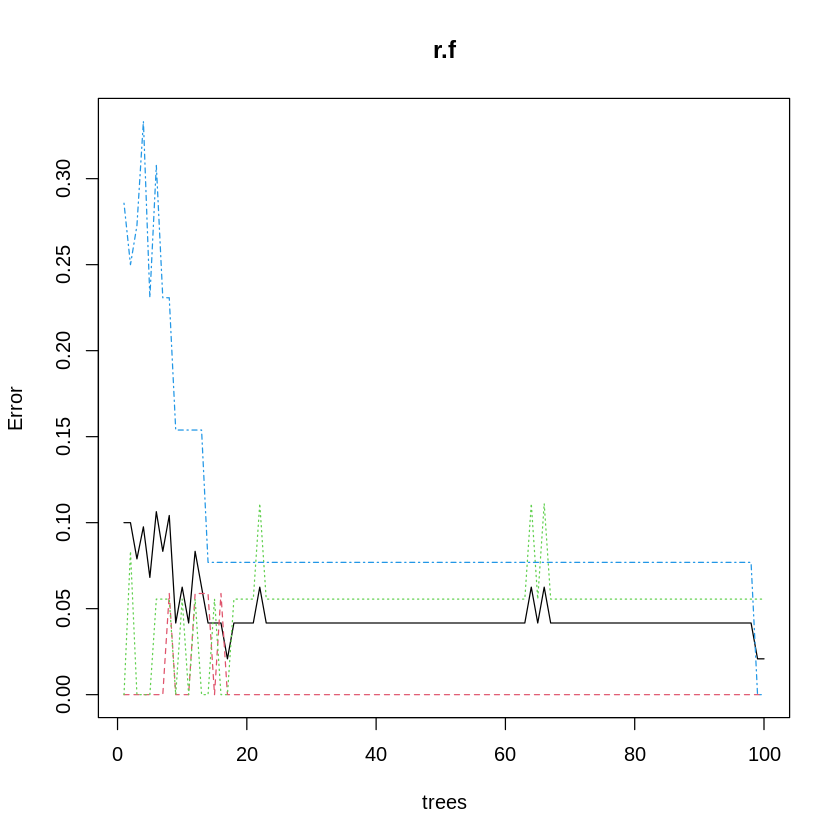

In [15]:
plot(r.f)

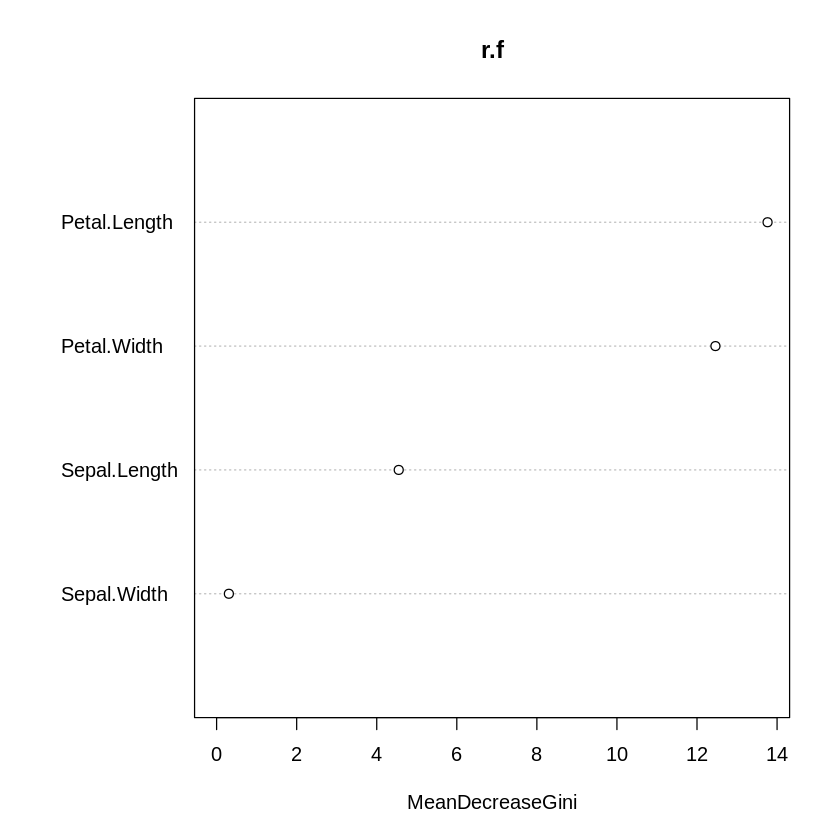

In [16]:
varImpPlot(r.f)

In [19]:
pre.rf <- predict(r.f, newdata=test.data)
table(pre.rf, test.data$Species)

            
pre.rf       setosa versicolor virginica
  setosa         33          0         0
  versicolor      0         32        11
  virginica       0          0        26

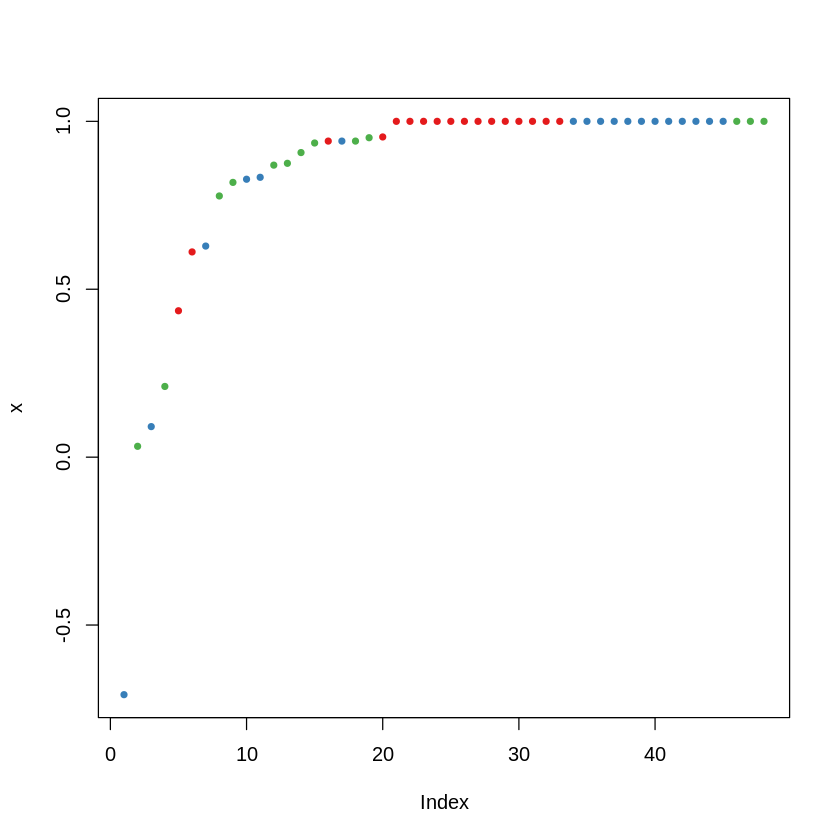

In [20]:
plot(margin(r.f, test.data$Species))